In [504]:
# Importar las librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from pandas_profiling import ProfileReport
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import metrics,linear_model,model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [505]:
traindata = pd.read_csv('dataset_train.csv')
testdata = pd.read_csv('dataset_test.csv')

In [506]:
print(traindata.groupby('defaulted_loan').size())

defaulted_loan
0    25305
1    10695
dtype: int64


Text(0.5, 1.0, 'Agrupando resultados de Clase defaulted_loan')

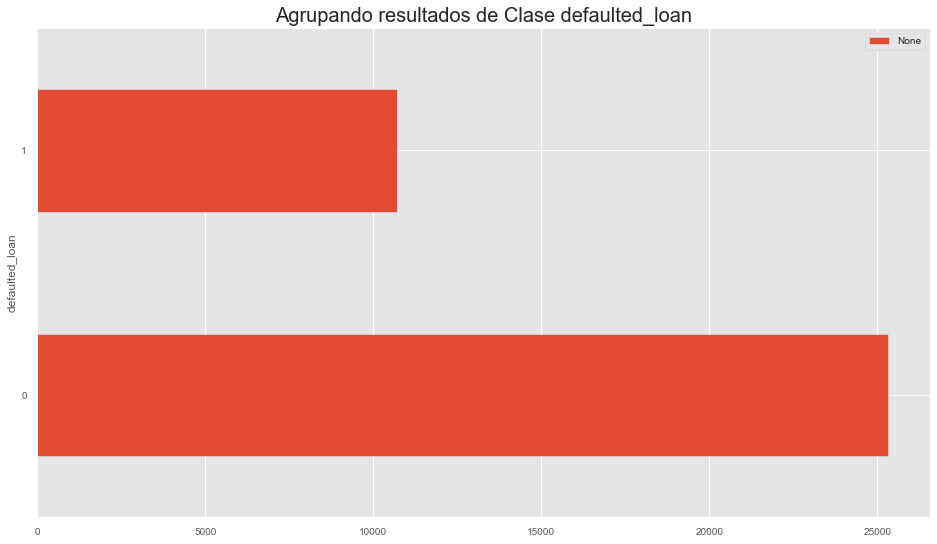

In [507]:
#Agrupar los datos de la clase (defaulted_loan) del dataset de entrenamiento
#Se observa que 25305 clientes realizaron el pago de sus creditos
#Se observa que 10695 clientes no realizaron el pago de sus creditos
dl = traindata.groupby('defaulted_loan').size()
dl.plot(kind='barh', legend='Reverse')
plt.title(u'Agrupando resultados de Clase defaulted_loan', size = 20.0)

credit_card_provider
Voyager                        2910
JCB 15 digit                   2943
Mastercard                     2967
Maestro                        2989
VISA 13 digit                  2994
Diners Club / Carte Blanche    3015
American Express               3050
Discover                       3159
VISA 16 digit                  5941
JCB 16 digit                   6032
dtype: int64


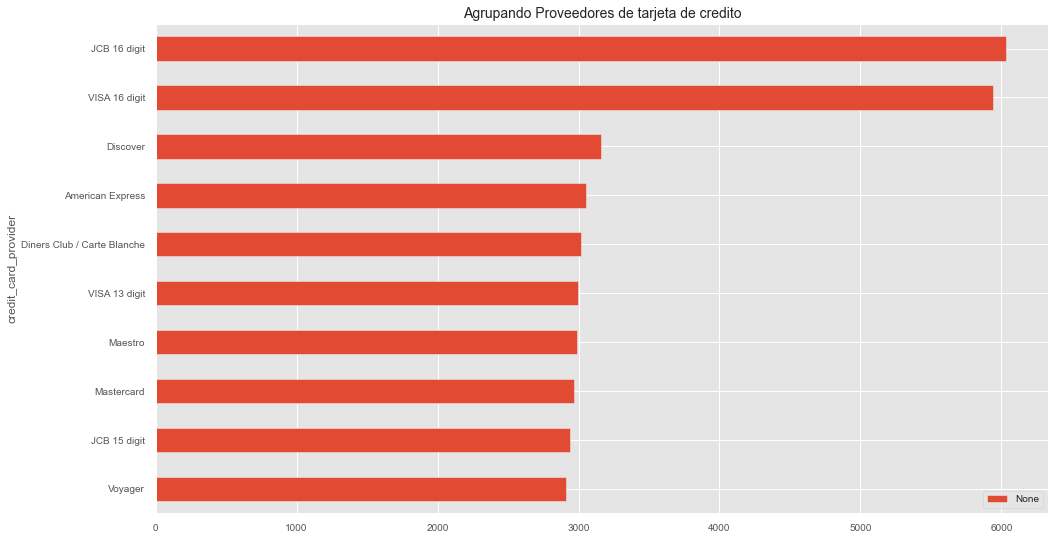

In [508]:
#Se realiza un pequeño analisis agrupando atributos no numericos
#para obtener alguno tipo de relacion con el analisis exploratorio
ccp = traindata.groupby('credit_card_provider').size().sort_values()
ccp.plot(kind='barh', legend='Reverse')
plt.title(u'Agrupando Proveedores de tarjeta de credito', size = 14.0)
print(traindata.groupby('credit_card_provider').size().sort_values())

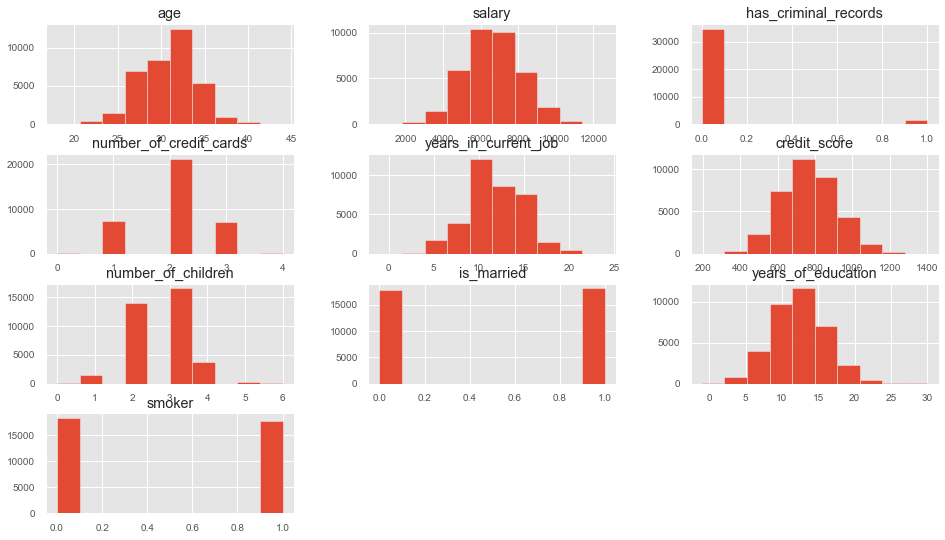

In [509]:
#Obtener la frecuencia de las variables a trabajar
traindata.drop(['car_licence_plate','company','application_date','name','phone_number','email_domain','current_job','credit_card_expire','credit_card_number','address','application_id','defaulted_loan'], axis=1).hist()
plt.show()

In [510]:
def ChangeCreditCardProvider(provider):
    if provider.find("JCB 16 digit") >=0:
        return 1
    elif provider.find("VISA 16 digit") >=0:
        return 2
    elif provider.find("Discover") >=0:
        return 3
    elif provider.find("American Express") >=0:
        return 4
    elif provider.find("Diners Club / Carte Blanche") >=0:
        return 5
    elif provider.find("Visa 13 digit") >=0:
        return 6
    elif provider.find("Maestro") >=0:
        return 7
    elif provider.find("Mastercard") >=0:
        return 8
    elif provider.find("JCB 15 digit") >=0:
        return 9
    elif provider.find("Voyager") >=0:
        return 10
    else:
        return 11

In [511]:
traindata['credit_card_provider'] = traindata['credit_card_provider'].apply(ChangeCreditCardProvider)
traindata

car_licence_plate   age  credit_card_provider  salary  \
0               HQK 648  33.0                     1    8424   
1               YBE 134  30.0                    11    5742   
2               ZPT-236  36.0                     1    7464   
3              HCT-4243  29.0                     2    5506   
4               IFU 236  33.0                    11    4657   
...                 ...   ...                   ...     ...   
35995             27TX4  32.0                     1    8081   
35996           BPZ I41  29.0                    10    9326   
35997    467-XOD1-86620  29.0                     2    7717   
35998           3441 DE  23.0                     4    5588   
35999           92-C505  32.0                     2    7316   

       has_criminal_records                company  number_of_credit_cards  \
0                         0   Soto Smith and Heath                       2   
1                         0           Peterson PLC                       2   
2                         0              Hardy Inc                       1   
3                         0            Ball-Guzman                       1   
4                         0          Stark-Salazar                       2   
...                     ...                    ...                     ...   
35995                     0               Khan Ltd                       2   
35996                     0         Leach-Castillo                       2   
35997                     0              White LLC                       2   
35998                     0  Irwin Ochoa and Foley                       2   
35999                     0        Rodriguez-Evans                       1   

       application_date  years_in_current_job  credit_score  ...  \
0       23/07/2013 9:29                    14           670  ...   
1      17/05/2016 12:03                     9           733  ...   
2       11/06/2014 4:54                    12           834  ...   
3      23/09/2015 12:55                    11           676  ...   
4      17/06/2014 15:56                    15           764  ...   
...                 ...                   ...           ...  ...   
35995  20/04/2014 13:20                     8           623  ...   
35996    3/05/2016 7:13                     8           889  ...   
35997   8/02/2015 10:57                     5           595  ...   
35998   27/09/2016 6:11                    12           662  ...   
35999  27/06/2013 21:32                    10           709  ...   

                     name  email_domain  years_of_education  \
0            Tiffany Moon   hotmail.com                  12   
1             Pamela Gray   hotmail.com                  14   
2         Katherine Moore     yahoo.com                   9   
3      Francisco Williams     yahoo.com                  16   
4          Jonathan Hardy     yahoo.com                   8   
...                   ...           ...                 ...   
35995       Greg Kane DVM     yahoo.com                  13   
35996        Jeanne Brown     gmail.com                  11   
35997         Jesse Brown   hotmail.com                  11   
35998       Jacob Jackson   hotmail.com                  18   
35999        Emily Cooley     gmail.com                  15   

                         current_job credit_card_expire  smoker  \
0           Education officer museum             abr-21       0   
1                 Investment analyst             nov-23       1   
2          Conference centre manager             nov-24       1   
3            Radiographer diagnostic             oct-23       1   
4                Art gallery manager             jul-26       0   
...                              ...                ...     ...   
35995               Ambulance person             oct-20       1   
35996                Camera operator             nov-20       0   
35997       Psychologist educational             may-22       1   
35998  Telecommunications researcher             may-23       0   
3

In [512]:
testdata['credit_card_provider'] = testdata['credit_card_provider'].apply(ChangeCreditCardProvider)

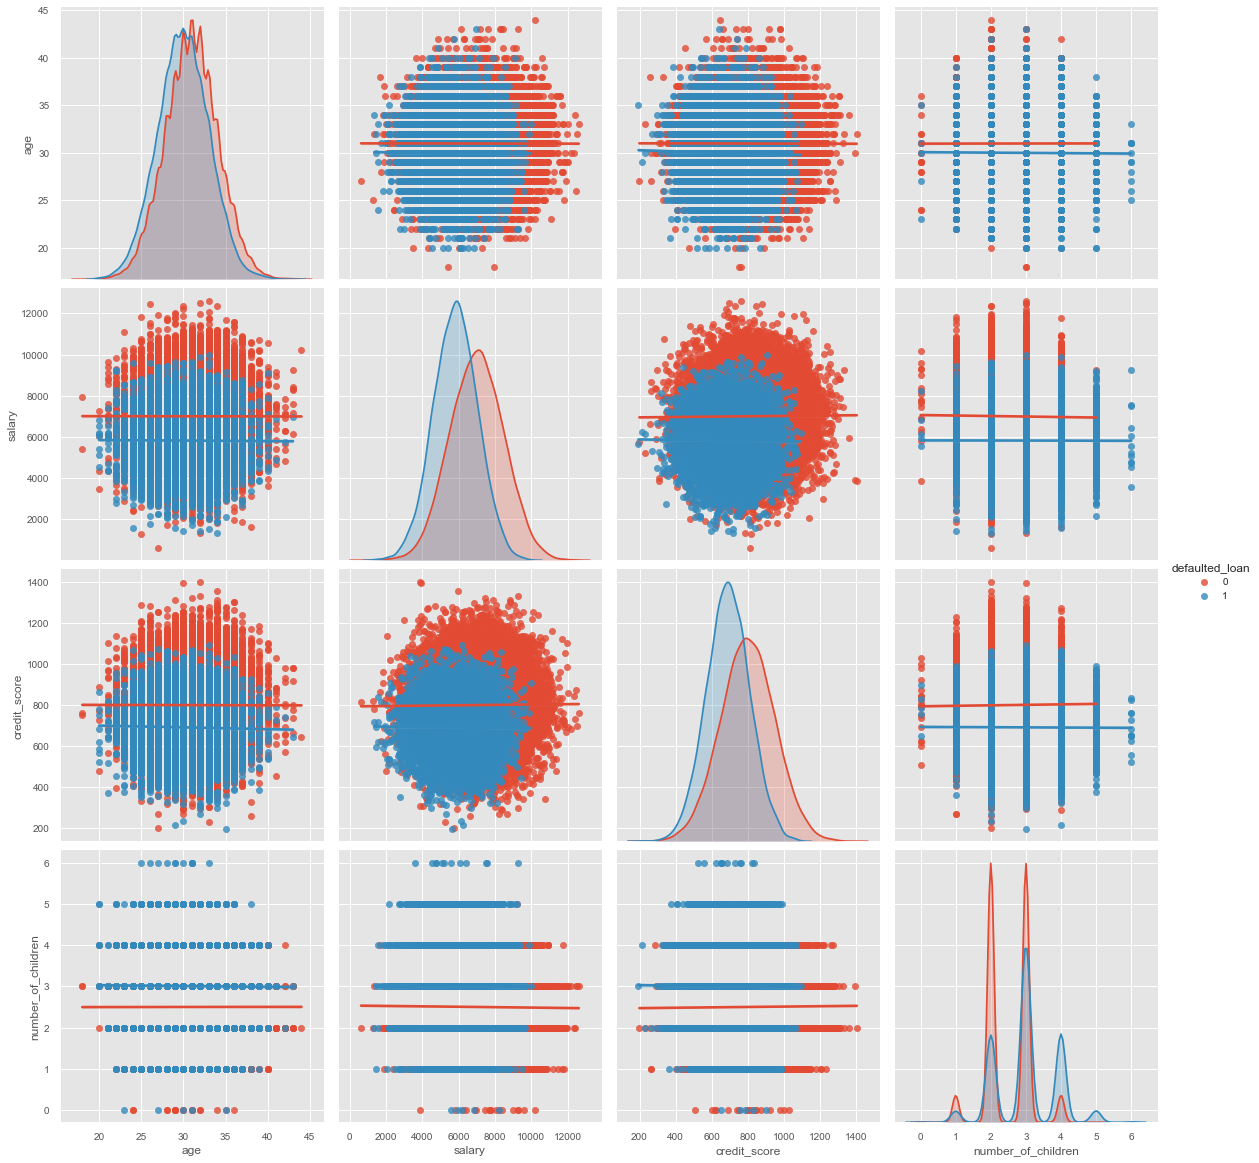

In [498]:
sb.pairplot(traindata.dropna(), hue='defaulted_loan',height=4,vars=["age", "salary","credit_score","number_of_children"],kind='reg')

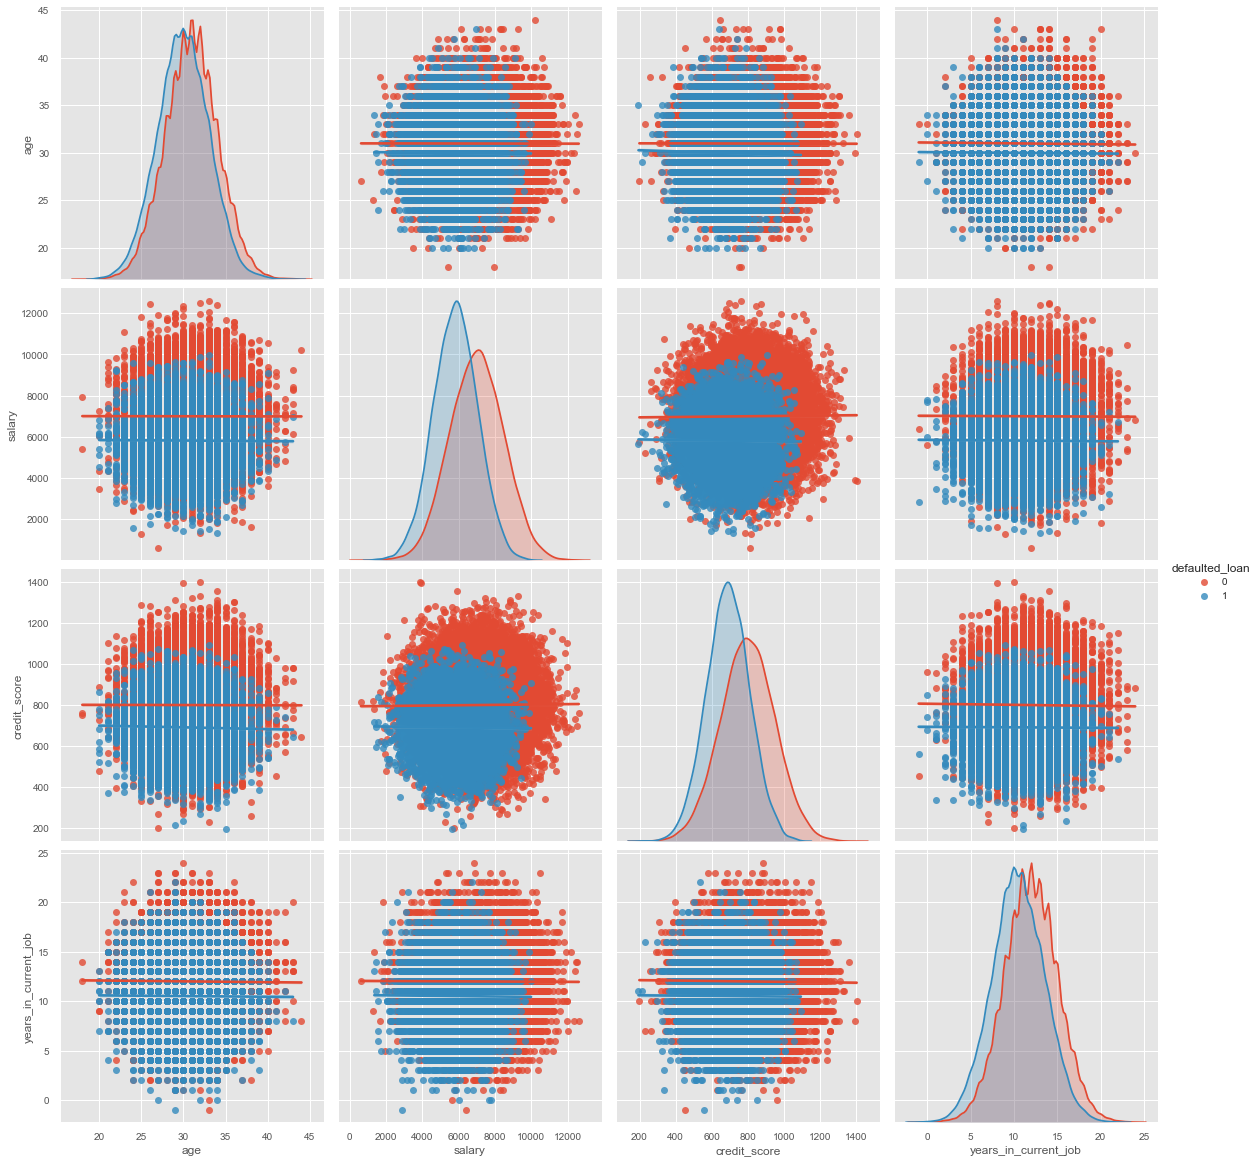

In [539]:
sb.pairplot(traindata.dropna(), hue='defaulted_loan',height=4,vars=["age", "salary","credit_score","years_in_current_job"],kind='reg')

In [529]:
xModel = np.array(traindata.drop(['car_licence_plate','credit_card_provider','company','application_date','name','phone_number','email_domain','current_job','credit_card_expire','credit_card_number','address','application_id','defaulted_loan',], 1))
yModel = np.array(traindata['defaulted_loan'])

xModel.shape

(36000, 10)

In [530]:
model = linear_model.LogisticRegression()
model.fit(xModel,yModel)

C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [531]:
predictions = model.predict(xModel)

In [532]:
model.score(xModel,yModel)

0.7926111111111112

In [533]:
validation_size = 0.20
seed = 10
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(xModel, yModel, test_size=validation_size, random_state=seed)

In [534]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=5, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMI

Logistic Regression: 0.786285 (0.007108)


C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [535]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.79375


In [536]:
print(confusion_matrix(Y_validation, predictions))

[[4642  431]
 [1054 1073]]


In [537]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      5073
           1       0.71      0.50      0.59      2127

    accuracy                           0.79      7200
   macro avg       0.76      0.71      0.73      7200
weighted avg       0.78      0.79      0.78      7200



In [538]:
y_scores = gnb.predict_proba(X_validation)
fpr, tpr, threshold = roc_curve(Y_validation, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

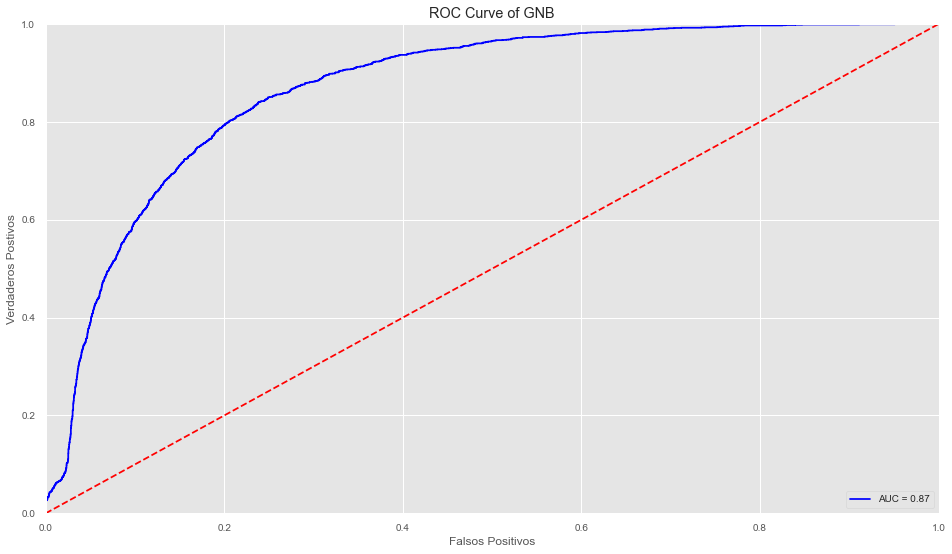

In [403]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Verdaderos Postivos')
plt.xlabel('Falsos Positivos')
plt.title('ROC Curve of GNB')
plt.show()

In [404]:
traindata.shape

(36000, 23)

In [405]:
testdata.shape

(24000, 22)

In [305]:
traindata.describe()

age  credit_card_provider        salary  has_criminal_records  \
count  36000.000000          36000.000000  36000.000000          36000.000000   
mean      30.684639              5.217944   6654.306222              0.035944   
std        3.121985              3.457078   1499.670451              0.186154   
min       18.000000              1.000000    618.000000              0.000000   
25%       29.000000              2.000000   5616.000000              0.000000   
50%       31.000000              4.000000   6618.000000              0.000000   
75%       33.000000              8.000000   7667.250000              0.000000   
max       44.000000             11.000000  12612.000000              1.000000   

       number_of_credit_cards  years_in_current_job  credit_score  \
count            36000.000000          36000.000000  36000.000000   
mean                 1.998611             11.550639    766.769889   
std                  0.669004              3.107515    149.875122   
min                  0.000000             -1.000000    194.000000   
25%                  2.000000              9.000000    664.000000   
50%                  2.000000             12.000000    763.000000   
75%                  2.000000             14.000000    867.000000   
max                  4.000000             24.000000   1402.000000   

       number_of_children    is_married  years_of_education        smoker  \
count        36000.000000  36000.000000        36000.000000  36000.000000   
mean             2.649528      0.502917           12.376556      0.493028   
std              0.761608      0.499998            3.543147      0.499958   
min              0.000000      0.000000           -1.000000      0.000000   
25%              2.000000      0.000000           10.000000      0.000000   
50%              3.000000      1.000000           12.000000      0.000000   
75%              3.000000      1.000000           15.000000      1.000000   
max              6.000000      1.000000           30.000000      1.000000   

       credit_card_number  defaulted_loan  
count        3.600000e+04    36000.000000  
mean         2.122403e+20        0.297083  
std          2.225968e+20        0.456980  
min          6.040030e+10        0.000000  
25%          3.050000e+18        0.000000  
50%          8.700000e+19        0.000000  
75%          4.320000e+20        1.000000  
max          6.010000e+20        1.000000

In [321]:
profile = ProfileReport(traindata,title='Analisis Exploratorio dataset de entrenamiento',html = {'style':{'full_width':True}})

profile

In [500]:
x=traindata.drop(['car_licence_plate','company','application_date','name','phone_number','email_domain','current_job','credit_card_expire','credit_card_number','address','application_id','defaulted_loan',], axis=1)
y=traindata['defaulted_loan']

best=SelectKBest(k='all')
X_new = best.fit_transform(x, y)
X_new.shape
selected = best.get_support(indices=True)
print(x.columns[selected])

Index(['age', 'credit_card_provider', 'salary', 'has_criminal_records',
       'number_of_credit_cards', 'years_in_current_job', 'credit_score',
       'number_of_children', 'is_married', 'years_of_education', 'smoker'],
      dtype='object')


<AxesSubplot:title={'center':'Coeficiente de correlacion de Pearson'}>

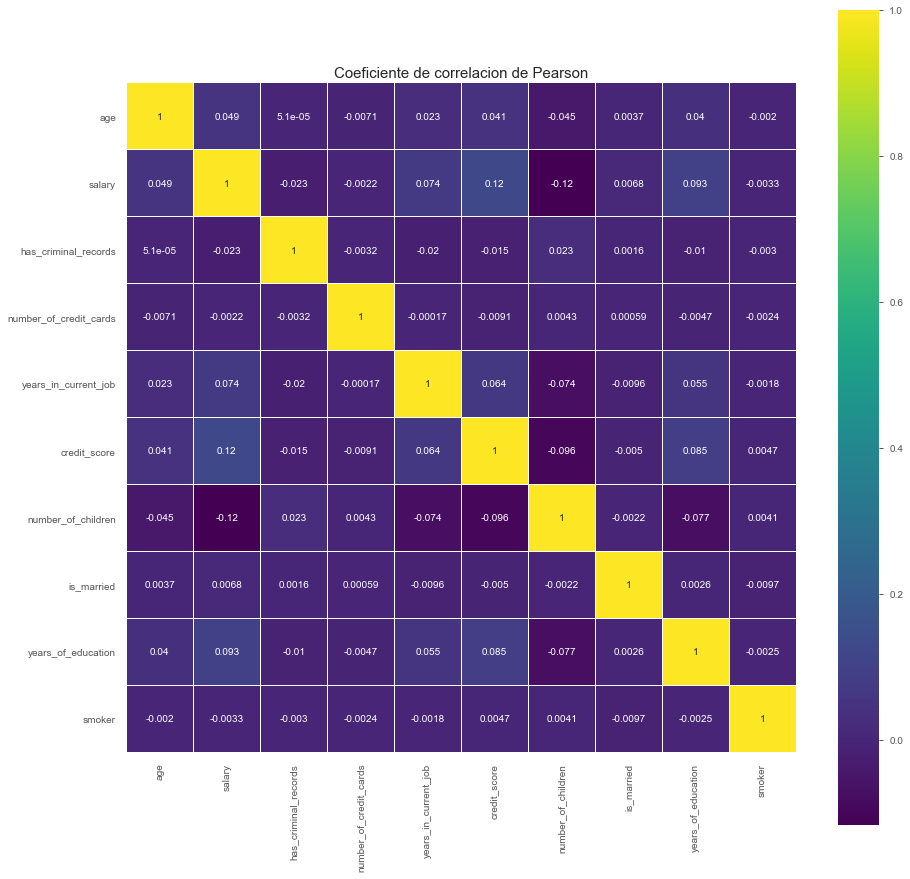

In [407]:
used_features =x.columns[selected]
 
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Coeficiente de correlacion de Pearson', y=1, size=15)
sb.heatmap(traindata[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [408]:
print("Gaussian Naive Bayes")
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=10)
# Instancia del clasificador
gnb = GaussianNB()
# clasificador de entrenamiento
gnb.fit(X_train,y_train)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Gaussian Naive Bayes
Precisión en el set de Entrenamiento: 0.81
Precisión en el set de Test: 0.81


In [409]:
kf = KFold(n_splits=10)
clf = LogisticRegression()
y_train.shape
clf.fit(X_train, y_train)
score = clf.score(X_train,y_train)
 
print("Metrica del modelo", score)
scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())
preds = clf.predict(X_test)
score_pred = metrics.accuracy_score(y_test, preds)
print("Metrica en Test", score_pred)


C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Metrica del modelo 0.7813541666666667


C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Metricas cross_validation [0.79097222 0.75520833 0.80034722 0.78715278 0.80555556 0.78055556
 0.79409722 0.778125   0.78680556 0.7875    ]
Media de cross_validation 0.7866319444444444
Metrica en Test 0.785


C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [411]:
#Definir variable xTest para los atributos del dataset_test
xTest=testdata.drop(['car_licence_plate','credit_card_provider','company','application_date','name','phone_number','email_domain','current_job','credit_card_expire','credit_card_number','address','application_id'], axis=1)

#Generar la prediccion a partir del dataset_test
predict = gnb.predict(xTest)
predict = pd.DataFrame(predict,columns=['defaulted_loan'])
yTest = predict
predict

defaulted_loan
0                   1
1                   0
2                   1
3                   1
4                   0
...               ...
23995               0
23996               1
23997               0
23998               0
23999               1

[24000 rows x 1 columns]

In [412]:
print(confusion_matrix(yTest, predict))

[[18130     0]
 [    0  5870]]


In [413]:
print(classification_report(yTest, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18130
           1       1.00      1.00      1.00      5870

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000



In [414]:
#Obtener solo la columna de application_id
appId = pd.DataFrame(testdata['application_id'],columns=['application_id'])
appId

application_id
0      RUWM2049266950699
1      ABXL7467194767600
2      CMRX9833260333404
3      FXNE1359007341856
4      WHZG3090814216827
...                  ...
23995  FGXN3101865811284
23996  WXIS2747015505897
23997  ULYM3716005603550
23998  LZXX6745046358460
23999  IINW9734994350222

[24000 rows x 1 columns]

In [415]:
#Concatenar el application_id con los resultados 
#de prediccion
datatest = pd.concat([appId,predict],axis=1)
datatest

application_id  defaulted_loan
0      RUWM2049266950699               1
1      ABXL7467194767600               0
2      CMRX9833260333404               1
3      FXNE1359007341856               1
4      WHZG3090814216827               0
...                  ...             ...
23995  FGXN3101865811284               0
23996  WXIS2747015505897               1
23997  ULYM3716005603550               0
23998  LZXX6745046358460               0
23999  IINW9734994350222               1

[24000 rows x 2 columns]

In [416]:
#Exportar el archivo csv (resultado)
datatest.to_csv('CarlosMojica_01-09-2020_PF_Proy_final_machine_learning.csv',index=False)

In [50]:
# Validaciones extras (dominios de correo electronico)
print(traindata.groupby('email_domain').size())

email_domain
gmail.com      12146
hotmail.com    11829
yahoo.com      12025
dtype: int64


In [242]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_licence_plate       36000 non-null  object 
 1   age                     36000 non-null  float64
 2   credit_card_provider    36000 non-null  int64  
 3   salary                  36000 non-null  int64  
 4   has_criminal_records    36000 non-null  int64  
 5   company                 36000 non-null  object 
 6   number_of_credit_cards  36000 non-null  int64  
 7   application_date        36000 non-null  object 
 8   years_in_current_job    36000 non-null  int64  
 9   credit_score            36000 non-null  int64  
 10  phone_number            36000 non-null  object 
 11  number_of_children      36000 non-null  int64  
 12  is_married              36000 non-null  int64  
 13  name                    36000 non-null  object 
 14  email_domain            36000 non-null

In [484]:
traindata.describe()

age  credit_card_provider        salary  has_criminal_records  \
count  36000.000000          36000.000000  36000.000000          36000.000000   
mean      30.684639              5.217944   6654.306222              0.035944   
std        3.121985              3.457078   1499.670451              0.186154   
min       18.000000              1.000000    618.000000              0.000000   
25%       29.000000              2.000000   5616.000000              0.000000   
50%       31.000000              4.000000   6618.000000              0.000000   
75%       33.000000              8.000000   7667.250000              0.000000   
max       44.000000             11.000000  12612.000000              1.000000   

       number_of_credit_cards  years_in_current_job  credit_score  \
count            36000.000000          36000.000000  36000.000000   
mean                 1.998611             11.550639    766.769889   
std                  0.669004              3.107515    149.875122   
min                  0.000000             -1.000000    194.000000   
25%                  2.000000              9.000000    664.000000   
50%                  2.000000             12.000000    763.000000   
75%                  2.000000             14.000000    867.000000   
max                  4.000000             24.000000   1402.000000   

       number_of_children    is_married  years_of_education        smoker  \
count        36000.000000  36000.000000        36000.000000  36000.000000   
mean             2.649528      0.502917           12.376556      0.493028   
std              0.761608      0.499998            3.543147      0.499958   
min              0.000000      0.000000           -1.000000      0.000000   
25%              2.000000      0.000000           10.000000      0.000000   
50%              3.000000      1.000000           12.000000      0.000000   
75%              3.000000      1.000000           15.000000      1.000000   
max              6.000000      1.000000           30.000000      1.000000   

       credit_card_number  defaulted_loan  
count        3.600000e+04    36000.000000  
mean         2.122403e+20        0.297083  
std          2.225968e+20        0.456980  
min          6.040030e+10        0.000000  
25%          3.050000e+18        0.000000  
50%          8.700000e+19        0.000000  
75%          4.320000e+20        1.000000  
max          6.010000e+20        1.000000

In [496]:
#predecir
#'age'-'salary'-'has_criminal_records'-'number_of_credit_cards'-'years_in_current_job'-'credit_score'-'number_of_children'-'is_married'-'years_of_education'-'smoker'
print(gnb.predict([[33,6498,0,2,17,667,4,0,13,1],
                   [26,6143,0,2,10,1047,1,0,8,0],
                   [33,7016,1,2,14,668,3,1,11,0],
                   [27,7900,0,3,13,617,3,0,10,0],
                   [25,6781,0,2,10,850,4,0,13,1]
                  ]))

[0 0 1 0 1]


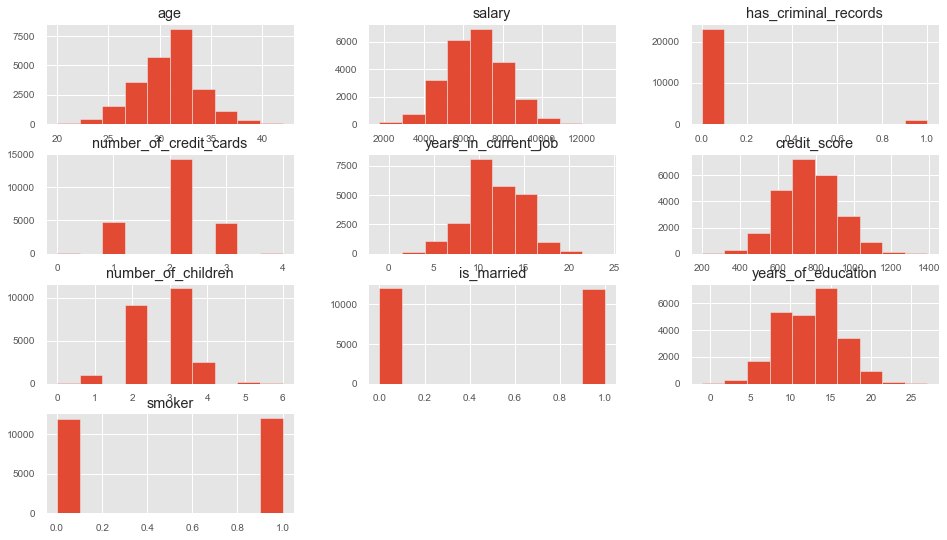

In [105]:
#Validando frecuencia de los atributos a trabajar del dataset_test
prueba = testdata.drop(['car_licence_plate','credit_card_provider','company','application_date','name','phone_number','email_domain','current_job','credit_card_expire','credit_card_number','address','application_id'], axis=1).hist()